In [1]:
from top_down_sorting import *
from vis import *
import numpy as np
import pickle

<class 'scipy.sparse._csr.csr_matrix'>


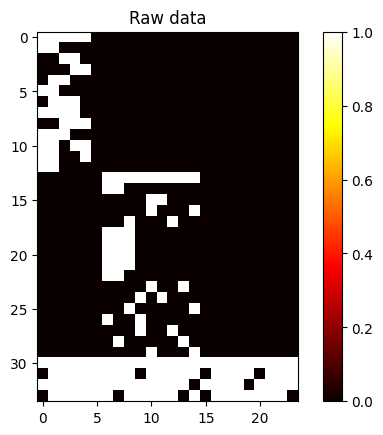

In [2]:
# Load raw data csr matrix
datafile = 'matrix2.pkl'
with open(datafile, "rb") as f:
    raw_csr : csr_matrix = pickle.load(f).T.tocsr()
print(type(raw_csr))
matrix_heatmap(raw_csr.toarray(), title='Raw data')

In [11]:
# Build heirarchical cache
m, n = raw_csr.shape
print(f'Starting m, n = {m, n}')
min_n, max_n = 4, n

raw_weights = np.ones(shape=(m,))
sorter = TopDownSorting(raw_csr, raw_weights)

for H, W, _ in sorter.build_cache((min_n, max_n)):
    current_m, current_n = H.shape
    matrix_heatmap(H.toarray(), title=f'Cache at #bins={current_n}, #edges={current_m}')

Starting m, n = (34, 24)


ValueError: axis 1 index 5 exceeds matrix dimension 4